### Author: Bhavik Ransubhe
### THE SPARKS FOUNDATION
### Data Science & Business Analytics
### TASK 6 - Prediction using Decision Tree Algorithm <br>(Level - Intermediate)
● Create the Decision Tree classifier and visualize it graphically.<br>
● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
%matplotlib inline

In [2]:
#Load iris dataset
data = pd.read_csv("iris.csv" ,index_col = 0)
data.head()# Displays first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.isnull().sum()  #to check if there is any null value

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing the dataet

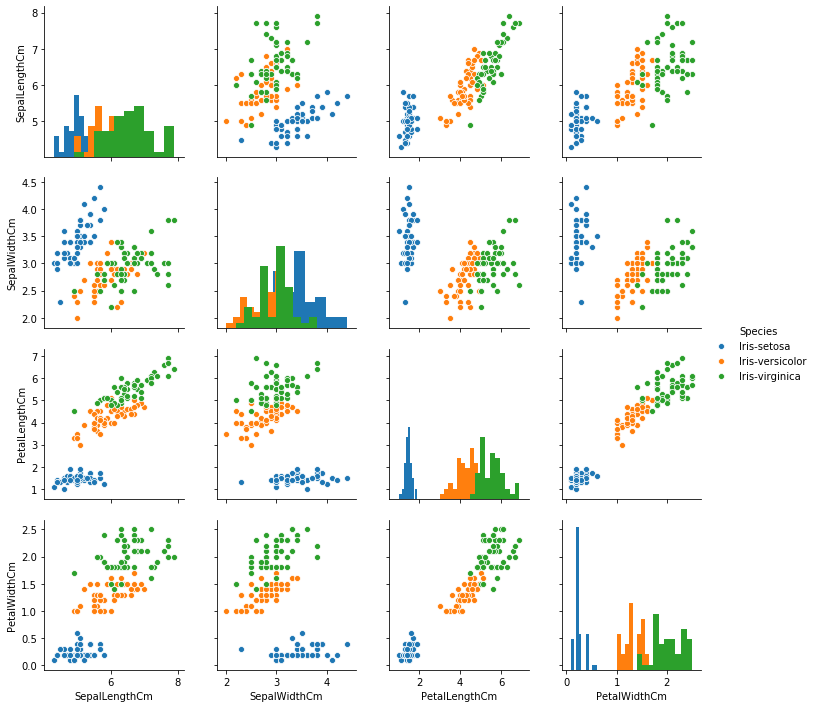

In [5]:
sns.pairplot(data, hue='Species',diag_kind="hist") #plotting the pair plot to Check relation of petal and sepal using pairplot

**It can be seen that one species Iris-setosa has different attributes from the other 2 species Iris-versicolor and Iris-virginica.**

### Building Desicion tree model
**Preparing the data**

In [6]:
x = data.values[:, [0, 1, 2, 3]]
y=data['Species']

In [7]:
x.shape

(150, 4)

In [8]:
y.shape

(150,)

**Splitting the data into Training and Test sets**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state = 100, test_size = 0.2)
# Display of data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [10]:
#Make an instance of the model
model1 = DecisionTreeClassifier()

#Train the model on the data
model1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Model Evaluation

In [11]:
# Comparing Actual vs Predicted results
Y_pred = model1.predict(X_test)
data2 = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
data2.head(10)

,Actual,Predicted
Id,,
129,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa
119,Iris-virginica,Iris-virginica
16,Iris-setosa,Iris-setosa
124,Iris-virginica,Iris-virginica
136,Iris-virginica,Iris-virginica
33,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
117,Iris-virginica,Iris-virginica


In [12]:
# Testing the accuracy of model prediction
accuracy_score(Y_test,Y_pred)

0.9666666666666667

### Visualizing the decision tree

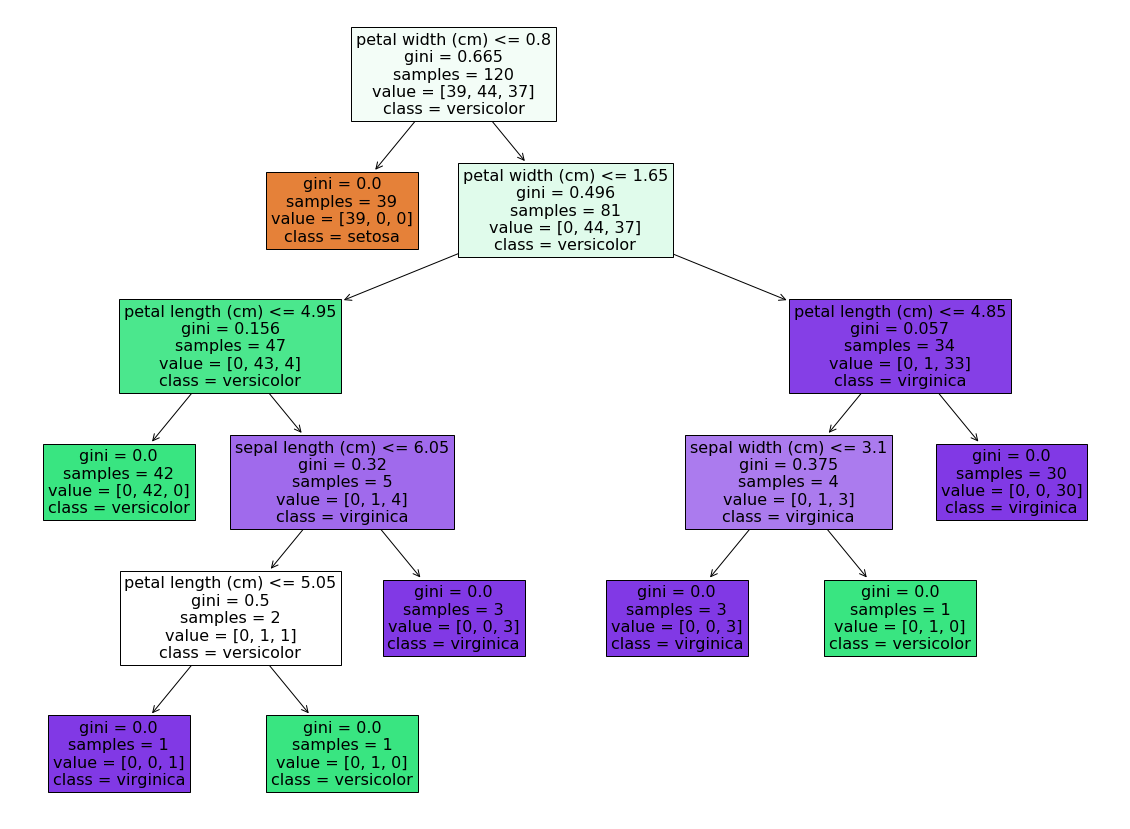

In [13]:
plt.figure(figsize=(20,15))
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
tree=plot_tree(model1,feature_names = fn, class_names = cn,filled = True)

### CONCLUSION 
**From above evaluation it has been observed that the model can predict the right class accordingly for new or test data with 96.66% accuracy (almost 97 %). So we can say that it is a good model for the prediction of the class based on the four parameters.**